In [1]:
#Importing some standard python packages

import matplotlib as mpl
import sys
import matplotlib.pyplot as plt
import numpy as np
import xspec as xs

In [2]:
import os, sys
sys.path.append('/Users/milena/Desktop/2nd_yr_project/ALPs/ALPs_analysis/') # path to calc_alp_signal script
from scipy import integrate
from calc_alp_signal import ALPSNSignal
from scipy.interpolate import interp1d

alp_sn = ALPSNSignal(Mprog = 10.)
EMeV = np.logspace(np.log10(0.0066664998531341555), np.log10(84591.548), 800) # 
ts = np.linspace(0.01, 50, 500) # 
ee, tt = np.meshgrid(EMeV,ts, indexing = 'ij')
dndedt_alp = alp_sn(EMeV, ts, g10=0.1)
sed = integrate.simps(dndedt_alp, ts, axis=1) / 145.41 # per MeV

m = sed == 0
sed[m] = 1e-40 
f = interp1d(np.log(EMeV*1000), np.log(sed/1000), 'cubic', fill_value='extrapolate') # per keV


# defining the ALP model

def ALP(engs, params, flux):
     for i in range(len(engs)-1):
        int_range = np.logspace(np.log10(engs[i]), np.log10(engs[i+1]), 100)  # make them in log steps? to test
        flux[i] = integrate.simps(np.exp(f(np.log(int_range))), int_range)
    
ALPInfo = ()
xs.AllModels.addPyMod(ALP, ALPInfo, 'add', spectrumDependent=False)

In [3]:
# trying joint fitting

xs.AllData.clear()

xs.AllData("1:1 bn101123952_n9_srcspectra.pha{*} \
1:2 bn101123952_na_srcspectra.pha{*} \
2:1 bn101123952_b1_srcspectra.pha{*} \
3:1 bn101123952_LAT-LLE_srcspectra.pha{*}")
# xs.AllData.ignore("1: **-8.0") # GBM 
# xs.AllData.ignore("1: **-200.")
# xs.AllData.ignore("2: **-200.") # GBM
# xs.AllData.ignore("3: 40e3-**") # LLE
# xs.AllData.ignore("bad")

In [4]:
xs.AllModels.clear()
m = xs.Model("grbm+cutoff")
xs.Fit.statMethod = "pgstat"
m.grbm.alpha.values = -1.00013
m.grbm.alpha.frozen = False
m.grbm.beta.values=-2.13524
m.grbm.beta.frozen = False
m.grbm.tem.values=182.685
m.grbm.tem.frozen = False
m.grbm.norm.values=1.15344E-02
m.grbm.norm.frozen = False
m.cutoffpl.HighECut.values = 500.000
m.cutoffpl.HighECut.frozen = False
m.cutoffpl.norm.values=9.14138E-02 
m.cutoffpl.norm.frozen=False
m.cutoffpl.PhoIndex.values = 0.624621 
m.cutoffpl.PhoIndex.frozen=False
xs.Fit.perform()

In [5]:
xs.Plot.device="/xs"
# xs.Plot.setRebin(3.0,12)
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=False
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("data ufspec model")#, "chisqresidual", "model")


User entered plot commands:


In [6]:
xVals_GBM1 = np.load('xVals_GBM1.npy')
yVals_GBM1 = np.load('yVals_GBM1.npy')
xErrs_GBM1 = np.load('xErrs_GBM1.npy')
yErrs_GBM1 = np.load('yErrs_GBM1.npy')


xVals_GBM2 = np.load('xVals_GBM2.npy')
yVals_GBM2 = np.load('yVals_GBM2.npy')
xErrs_GBM2 = np.load('xErrs_GBM2.npy')
yErrs_GBM2 = np.load('yErrs_GBM2.npy')

xVals_BGO = np.load('xVals_BGO.npy')
yVals_BGO = np.load('yVals_BGO.npy')
xErrs_BGO = np.load('xErrs_BGO.npy')
yErrs_BGO = np.load('yErrs_BGO.npy')

xVals_LLE = np.load('xVals_LLE.npy')
yVals_LLE = np.load('yVals_LLE.npy')
xErrs_LLE = np.load('xErrs_LLE.npy')
yErrs_LLE = np.load('yErrs_LLE.npy')
                                 
modVals_GBM1 = np.load('modVals_GBM1.npy')
modVals_GBM2 = np.load('modVals_GBM2.npy')
modVals_BGO = np.load('modVals_BGO.npy')
modVals_LLE = np.load('modVals_LLE.npy')



xVals_GBM1alp = np.load('xVals_GBM1alp.npy')
yVals_GBM1alp = np.load('yVals_GBM1alp.npy')
xErrs_GBM1alp = np.load('xErrs_GBM1alp.npy')
yErrs_GBM1alp = np.load('yErrs_GBM1alp.npy')


xVals_GBM2alp = np.load('xVals_GBM2alp.npy')
yVals_GBM2alp = np.load('yVals_GBM2alp.npy')
xErrs_GBM2alp = np.load('xErrs_GBM2alp.npy')
yErrs_GBM2alp = np.load('yErrs_GBM2alp.npy')

xVals_BGOalp = np.load('xVals_BGOalp.npy')
yVals_BGOalp = np.load('yVals_BGOalp.npy')
xErrs_BGOalp = np.load('xErrs_BGOalp.npy')
yErrs_BGOalp = np.load('yErrs_BGOalp.npy')

xVals_LLEalp = np.load('xVals_LLEalp.npy')
yVals_LLEalp = np.load('yVals_LLEalp.npy')
xErrs_LLEalp = np.load('xErrs_LLEalp.npy')
yErrs_LLEalp = np.load('yErrs_LLEalp.npy')
                                 
modVals_GBM1alp = np.load('modVals_GBM1alp.npy')
modVals_GBM2alp = np.load('modVals_GBM2alp.npy')
modVals_BGOalp = np.load('modVals_BGOalp.npy')
modVals_LLEalp = np.load('modVals_LLEalp.npy')

In [7]:
#Importing some standard python packages

import matplotlib as mpl

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

plt.rc('font', family='serif', size=20)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

%matplotlib inline

/Users/milena/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/milena/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


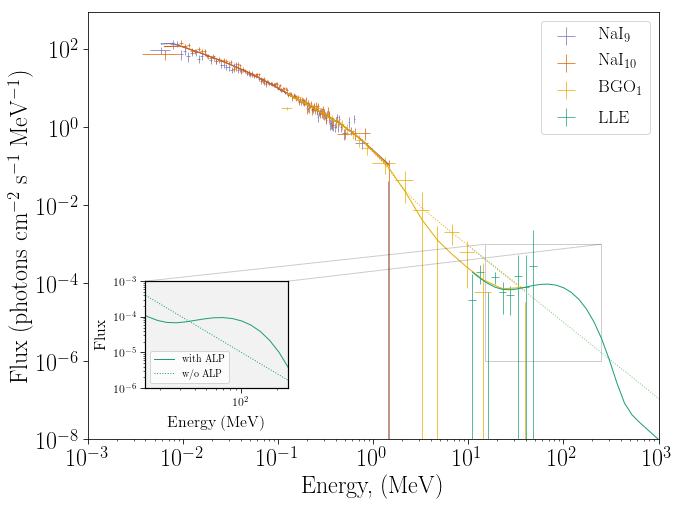

In [8]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec

palette = plt.get_cmap('Dark2')
palette2 = plt.get_cmap('Accent')

f = plt.figure(figsize=(8,6))
ax1 = f.add_axes([0.01, 0.01, 0.99, 0.99])
ax2 = f.add_axes([0.14, 0.16, 0.3, 0.3])
f.tight_layout()
gs = gridspec.GridSpec(2,1, height_ratios=[3, 1])

ax1.errorbar(xVals_GBM1alp,yVals_GBM1alp,xerr=xErrs_GBM1alp,yerr=yErrs_GBM1alp, color=palette(2), linestyle='None', label = 'NaI$_{9}$',linewidth =0.7)
ax1.errorbar(xVals_GBM2alp,yVals_GBM2alp,xerr=xErrs_GBM2alp,yerr=yErrs_GBM2alp, color=palette(1), linestyle='None',label = 'NaI$_{10}$',linewidth =0.7)
ax1.errorbar(xVals_BGOalp,yVals_BGOalp,xerr=xErrs_BGOalp,yerr=yErrs_BGOalp, color=palette(5), linestyle='None', label = 'BGO$_{1}$',linewidth =0.7)
ax1.errorbar(xVals_LLEalp,yVals_LLEalp,xerr=xErrs_LLEalp,yerr=yErrs_LLEalp, color=palette(0), linestyle='None',label = 'LLE',linewidth =0.7)

ax1.plot(xVals_GBM1, modVals_GBM1, linestyle = ':',color=palette(2), linewidth =1)
ax1.plot(xVals_GBM1alp, modVals_GBM1alp, linestyle = '-',color=palette(2), linewidth =1)

ax1.plot(xVals_GBM2, modVals_GBM2, linestyle = ':',color=palette(1), linewidth =1 )
ax1.plot(xVals_GBM2alp, modVals_GBM2alp, linestyle = '-',color=palette(1), linewidth =1 )

ax1.plot(xVals_BGO, modVals_BGO, linestyle = ':', color=palette(5), linewidth =1 )
ax1.plot(xVals_BGOalp, modVals_BGOalp, linestyle = '-', color=palette(5), linewidth =1 )

ax1.plot(xVals_LLE, modVals_LLE, linestyle = ':', linewidth =1, color=palette2(0) )
ax1.plot(xVals_LLEalp, modVals_LLEalp, linestyle = '-', linewidth =1, color=palette(0) )

ax1.legend(fontsize=18)
ax1.set_ylabel('Flux (photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$)',fontsize=24)
ax1.set_xlabel('Energy, (MeV)',fontsize=24)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-8, )
ax1.set_xlim(1e-3, 1e3)
# ax1.set_xticklabels([])
# ax1.get_xaxis().set_visible(False)

from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

ip = InsetPosition(ax1, [0.1, 0.12, 0.25, 0.25])
ax2.set_axes_locator(ip)
mark_inset(ax1, ax2, loc1=1, loc2=2, ec='k', alpha=0.2)
ax2.set_xscale('log')
ax2.plot(xVals_LLEalp, modVals_LLEalp, linestyle = '-', linewidth =1, color=palette(0),label='with ALP')
ax2.plot(xVals_LLE, modVals_LLE, linestyle = ':', linewidth =1, color=palette(0), label='w/o ALP')
ax2.set_yscale('log')
ax2.legend(fontsize=10)
ax2.set_ylim(1e-6,1e-3)
ax2.set_xlim(1.5e1,250)
ax2.set_xlabel('Energy (MeV)', fontsize=16)
ax2.set_ylabel('Flux', fontsize=16)

ax2.tick_params(color='k', labelcolor='k')
ax2.set_facecolor((0.95,0.95,0.95))
for spine in ax2.spines.values():
    spine.set_edgecolor('k')
    spine.set_linewidth(1.2)
ax2.tick_params(axis='both', labelsize=12)

ax1.tick_params(axis = 'y', labelsize=24)
ax1.tick_params(axis = 'x', labelsize=24)

plt.tight_layout()


# plt.savefig('101123A_final.pdf',bbox_inches='tight')

In [9]:
xratVals_GBM1alp = np.load('xratVals_GBM1alp.npy')
yratVals_GBM1alp = np.load('yratVals_GBM1alp.npy')
xratErrs_GBM1alp = np.load('xratErrs_GBM1alp.npy')
yratErrs_GBM1alp = np.load('yratErrs_GBM1alp.npy')


xratVals_GBM2alp = np.load('xratVals_GBM2alp.npy')
yratVals_GBM2alp = np.load('yratVals_GBM2alp.npy')
xratErrs_GBM2alp = np.load('xratErrs_GBM2alp.npy')
yratErrs_GBM2alp = np.load('yratErrs_GBM2alp.npy')

xratVals_BGOalp = np.load('xratVals_BGOalp.npy')
yratVals_BGOalp = np.load('yratVals_BGOalp.npy')
xratErrs_BGOalp = np.load('xratErrs_BGOalp.npy')
yratErrs_BGOalp = np.load('yratErrs_BGOalp.npy')

xratVals_LLEalp = np.load('xratVals_LLEalp.npy')
yratVals_LLEalp = np.load('yratVals_LLEalp.npy')
xratErrs_LLEalp = np.load('xratErrs_LLEalp.npy')
yratErrs_LLEalp = np.load('yratErrs_LLEalp.npy')

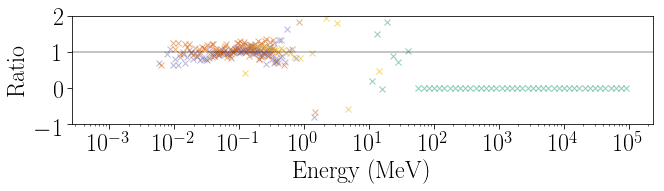

In [10]:
f = plt.figure(figsize=(10.4,2))
# plt.xlim(1e-3, 1e3)
plt.ylim(-1, 2)
plt.scatter(xratVals_GBM1alp, yratVals_GBM1alp,  marker='x',color=palette(2),alpha=0.5,linewidth =1)
plt.scatter(xratVals_GBM2alp, yratVals_GBM2alp, marker='x',color=palette(1),alpha=0.5,linewidth =1)
plt.scatter(xratVals_BGOalp, yratVals_BGOalp, marker='x',color=palette(5),alpha=0.5,linewidth =1)
plt.scatter(xratVals_LLEalp, yratVals_LLEalp, marker='x',color=palette(0),alpha=0.5,linewidth =1)
plt.axhline(1, color='k', alpha=0.3)
plt.xscale('log')
plt.ylabel('Ratio', fontsize=24)
plt.xlabel('Energy (MeV)', fontsize=24)
plt.tick_params(FormatStrFormatter('%.2f')
                )
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)          
               
# plt.xlim(10,250)
plt.xscale('log')
#plt.savefig('Ratio.pdf',bbox_inches='tight')